# 0. Background

## 0.0 Homework 3 of Machine Learning Course
Written by Kyle Lee  
2018/10/19

## 0.1 Data: 
https://archive.ics.uci.edu/ml/datasets/default%20of%20credit%20card%20clients

## 0.2 Source:

Name: I-Cheng Yeh 
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw 
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan. 
other contact information: 886-2-26215656 ext. 3181 

## 0.3 Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



## 0.4 Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



# 1. Import Libraries, Data

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
# df = pd.read_csv('../Data/default of credit card clients.csv', index_col='ID')
df=pd.read_csv('default of credit card clients.csv',index_col='ID')

# 2. Exploratory Data Analysis

In [6]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
df.shape

(30000, 24)

# 3. Data Wrangling

In [9]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [10]:
df.columns=df.columns.str.lower()

In [11]:
float(df['default'].sum())/len(df)

0.2212

In [12]:
cont_cols = ['limit_bal', 'age', 
             'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
                'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
cat_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
cat_cols = [c.lower() for c in cat_cols]

In [13]:
df[cont_cols]=df[cont_cols].apply(lambda x: (x-np.mean(x))/np.std(x))

In [14]:
cat_cols

['sex',
 'education',
 'marriage',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

In [15]:
# looking at the data, pay_x has negative values, need to add 2 so can OHE
col_pay = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [16]:
df[col_pay].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [17]:
df[col_pay] = df[col_pay].apply(lambda x: x+2)

In [18]:
df.shape

(30000, 24)

In [19]:
X = df.iloc[:, 0:23]

In [20]:
X.shape

(30000, 23)

In [21]:
y = df['default']

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
enc = OneHotEncoder(categorical_features=[1,2,3,5,6,7,8,9,10])

In [24]:
X = enc.fit_transform(X)

In [25]:
X.shape

(30000, 91)

# 4. Modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df.default, random_state=1)

In [28]:
#sns.pairplot(df[cont_cols[2:7]+ ['default']])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
log_clf = LogisticRegression()

In [31]:
params={'C': [100,10,1,.01,.001]}

In [32]:
gs = GridSearchCV(log_clf, params, scoring='roc_auc', n_jobs=-1)

In [33]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [100, 10, 1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [34]:
print ('Best params: ', gs.best_params_)
print ('Best auc on training set: ', gs.best_score_)
print ('Best auc on test set: ', gs.score(X_test, y_test))


Best params:  {'C': 1}
Best auc on training set:  0.7673617259600921
Best auc on test set:  0.7704415912410526


In [35]:
y_pred = gs.predict(X_test)

In [36]:
y_prob = gs.decision_function(X_test)

In [37]:
log_clf = LogisticRegression()
print('accuracy score on training set: ', cross_val_score(log_clf, X_train, y_train, n_jobs=-1).mean())
print('accuracy score on testing set: ', accuracy_score(y_pred, y_test))

accuracy score on training set:  0.8208570859689007
accuracy score on testing set:  0.8194444444444444


# 5. Metrics

In [38]:
def plot_roc(prob):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])

    plt.figure(figsize=[9,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate', fontsize=18)
    plt.ylabel('true positive rate', fontsize=18)
    plt.title('ROC curve for credit default', fontsize=18)
    plt.legend(loc='lower right')
    plt.show()

In [39]:
def plot_confusion(prediction):
    conmat = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['default', 'not default'], 
                             columns=['predicted default', 'predicted not default'])
    print(confusion)

In [40]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7009
          1       0.67      0.36      0.47      1991

avg / total       0.80      0.82      0.80      9000



In [41]:
confusion_matrix(y_test, y_pred)

array([[6664,  345],
       [1280,  711]], dtype=int64)

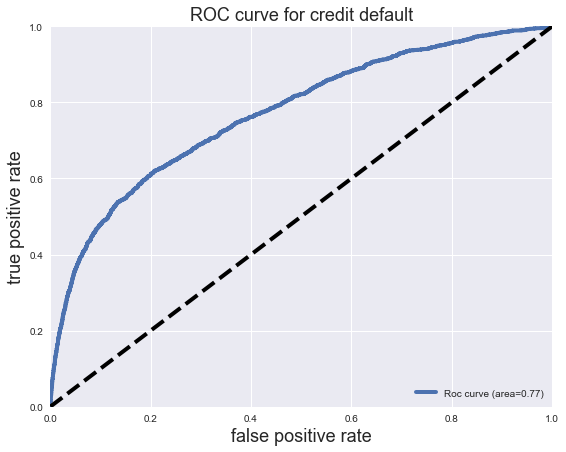

In [42]:
y_score = y_prob
fpr = dict()
tpr = dict()
roc_auc=dict()
fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
roc_auc[1] = auc(fpr[1], tpr[1])

plt.figure(figsize=[9,7])
plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
plt.plot([1,0], [1,0], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('false positive rate', fontsize=18)
plt.ylabel('true positive rate', fontsize=18)
plt.title('ROC curve for credit default', fontsize=18)
plt.legend(loc='lower right')

## 6. Homework starts here
Calculating the elements of the confusion matrix without using the package

In [48]:
#True positive
TP=sum((y_pred==1)&(y_test==1))
print("True positive = ", TP)

True positive =  711


In [49]:
#True Negative
TN=sum((y_pred==0)&(y_test==0))
print("True negative = ", TN)

True negative =  6664


In [50]:
#False Positive
FP=sum((y_pred==1)&(y_test==0))
print("False Positive = ",FP)

False Positive =  345


In [52]:
#False Negative
FN=sum((y_pred==0)&(y_test==1))
print("False negative = ", FN)

False negative =  1280


In [54]:
#Put all together
print("confusion matrix:\n",TN,FP,"\n",FN,TP)

confusion matrix:
 6664 345 
 1280 711


In [53]:
confusion_matrix(y_test, y_pred)

array([[6664,  345],
       [1280,  711]], dtype=int64)

In [55]:
Precision=TP/(TP+FN)
print("Precision = ", Precision)

Precision =  0.3571069814163737


In [56]:
Recall=TP/(TP+FP)
print("Recall = ",Recall)

Recall =  0.6732954545454546


In [58]:
#check if same
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7009
          1       0.67      0.36      0.47      1991

avg / total       0.80      0.82      0.80      9000



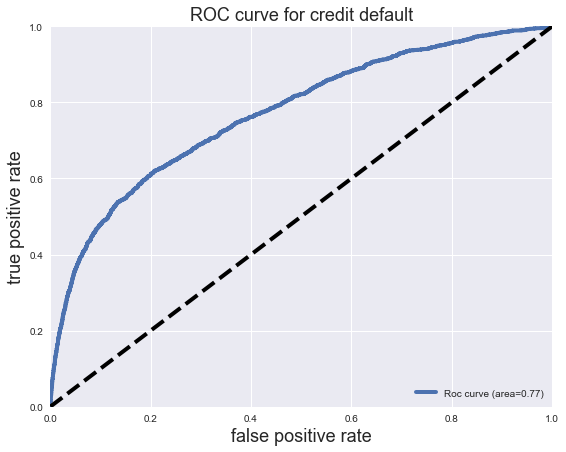

In [59]:
y_score = y_prob
fpr = dict()
tpr = dict()
roc_auc=dict()
fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
roc_auc[1] = auc(fpr[1], tpr[1])

plt.figure(figsize=[9,7])
plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
plt.plot([1,0], [1,0], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('false positive rate', fontsize=18)
plt.ylabel('true positive rate', fontsize=18)
plt.title('ROC curve for credit default', fontsize=18)
plt.legend(loc='lower right')

In [64]:
#AUC
roc_auc[1]

0.7704415912410526

In [65]:
def fast_auc(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i * nfalse
    auc /= (nfalse * (n - nfalse))
    return auc

In [67]:
#AUC without package
fast_auc(y_test, y_prob)

0.7704415912410527

## 7. SVM
a. Use C=1 (default value) and calculate the AUC. 



In [68]:
from sklearn import svm
clf=svm.SVC(C=1)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
y_pred = clf.predict(X_test)

In [70]:
y_prob = clf.decision_function(X_test)

In [73]:
#AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob)

0.7306206506823866

In [74]:
#Either works
fast_auc(y_test,y_prob)

0.7306206506823866

b. Bonus: Use sklearn.model_selection.gridsearchcv to find the best parameters.  The arguments for this model are:

i. Estimator (use the same as part 1)

ii. param_grid: try [{'kernel': ['linear'], 'C': [1, 10, 100}]

iii. scoring: ‘roc_auc'
 

In [76]:
params=[{'kernel':['linear'],'C':[1,10, 100]}]
clf=svm.SVC()
gs = GridSearchCV(clf, params, scoring='roc_auc', verbose=2, n_jobs=1)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
print ('Best params: ', gs.best_params_)
print ('Best auc on training set: ', gs.best_score_)
print ('Best auc on test set: ', gs.score(X_test, y_test))


In [77]:
#Above should work, but when kernel='linear', and C=10 or 100, it runs endlessly.
#Dunno why yet.